In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("balanced_tcp_dataset.csv")

In [8]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11788 entries, 0 to 11787
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frame.time_relative  11788 non-null  float64
 1   ip.src               11788 non-null  object 
 2   ip.dst               11788 non-null  object 
 3   tcp.srcport          11788 non-null  int64  
 4   tcp.dstport          11788 non-null  int64  
 5   tcp.flags            11788 non-null  int64  
 6   frame.len            11788 non-null  int64  
 7   label                11788 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 736.9+ KB
None
frame.time_relative    0
ip.src                 0
ip.dst                 0
tcp.srcport            0
tcp.dstport            0
tcp.flags              0
frame.len              0
label                  0
dtype: int64


# Exploratory Data Analysis

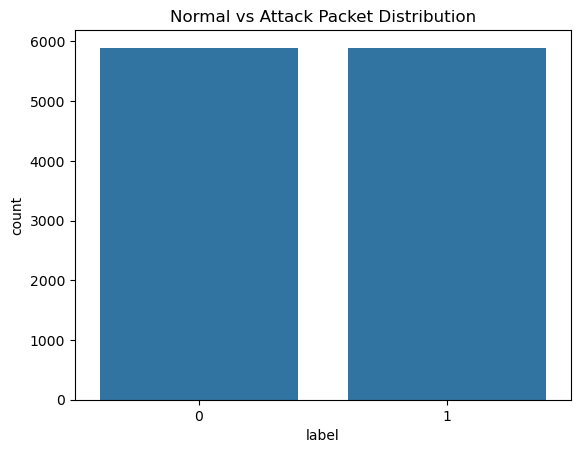

In [9]:
# Label Distribution
sns.countplot(x="label", data=df)
plt.title("Normal vs Attack Packet Distribution")
plt.show()

Text(0.5, 1.0, 'Packet Length Distribution')

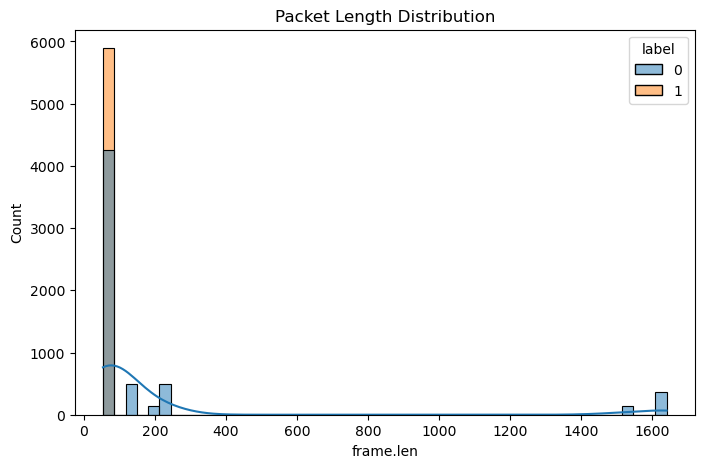

In [10]:
# Packet Length Analysis
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="frame.len", hue="label", bins=50, kde=True)
plt.title("Packet Length Distribution")

In [4]:
#Model Training
le = LabelEncoder()
df["tcp.flags"] = le.fit_transform(df["tcp.flags"])

X = df[[
    "frame.time_relative",
    "tcp.srcport",
    "tcp.dstport",
    "tcp.flags",
    "frame.len"
]]

y = df["label"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1482    0]
 [   0 1465]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1482
           1       1.00      1.00      1.00      1465

    accuracy                           1.00      2947
   macro avg       1.00      1.00      1.00      2947
weighted avg       1.00      1.00      1.00      2947

